### Applied Data Science First Assignment ###

In [1]:
import pandas as pd
import csv
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt

### Upload the CSV File ###

In [2]:
df = pd.read_csv('C:/Users/Mian Faheem/Desktop/StudentPerformanceFactors.csv')
df.head()
df.describe()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


*** Now, I should clean the data, check the duplicate and missing values ***

In [3]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)



Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [4]:
df.drop_duplicates(inplace=True)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
for column in df.select_dtypes(include=['object']).columns:
    unique_values = df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,0,0,7,73,0,0,0,0,0,0,0,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,0,2,1,0,0,1,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,0,2,1,0,0,2,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,0,1,1,0,0,1,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,0,3,1,1,0,2,4,0,1,0,1,70


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  School_Type                 6607 non-null   int64
 12  Peer_Influence              6607 non-null   int64
 13  Physical_Activity           6607 non-null   int64
 14  Learning

** Histrogram Graph **

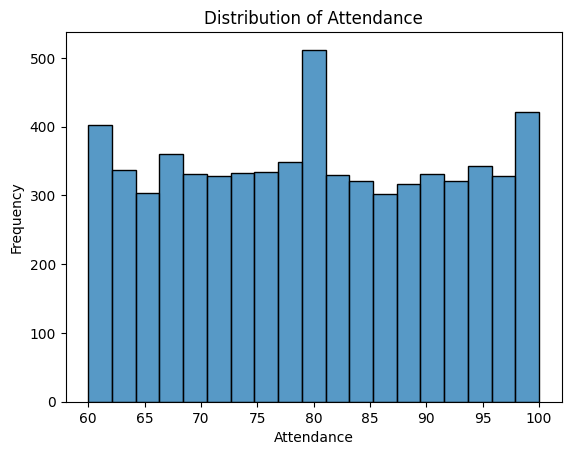

In [62]:
sns.histplot(data=df, x='Attendance')
plt.title('Distribution of Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

*** Pie Plot ***

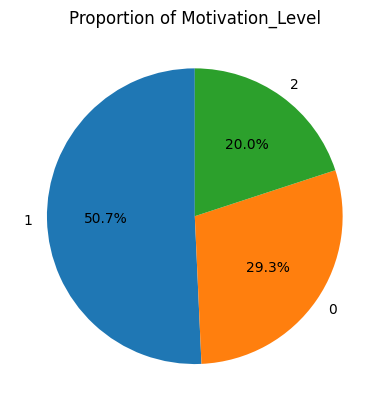

In [6]:
category_counts = df['Motivation_Level'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Motivation_Level')

plt.show()

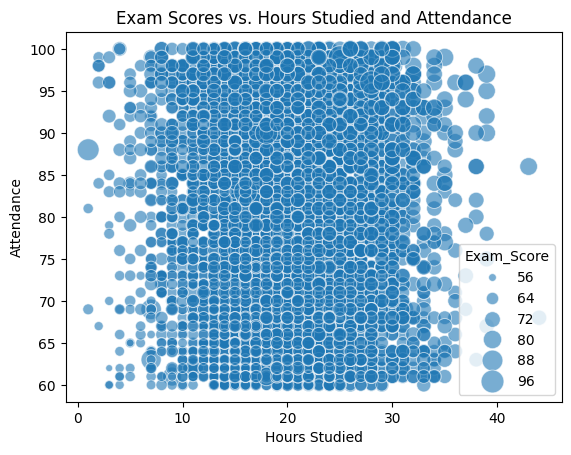

In [7]:
sns.scatterplot(data=df, x='Hours_Studied', y='Attendance', size='Exam_Score', sizes=(25, 300), alpha=0.6)
plt.title('Exam Scores vs. Hours Studied and Attendance')
plt.xlabel('Hours Studied')
plt.ylabel('Attendance')
plt.show()

** Scatter Plot **

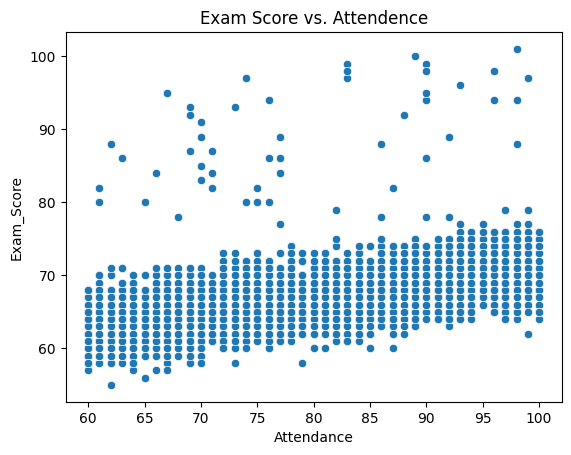

In [8]:

sns.scatterplot(data=df, x='Attendance', y='Exam_Score')
plt.title('Exam Score vs. Attendence')
plt.show()

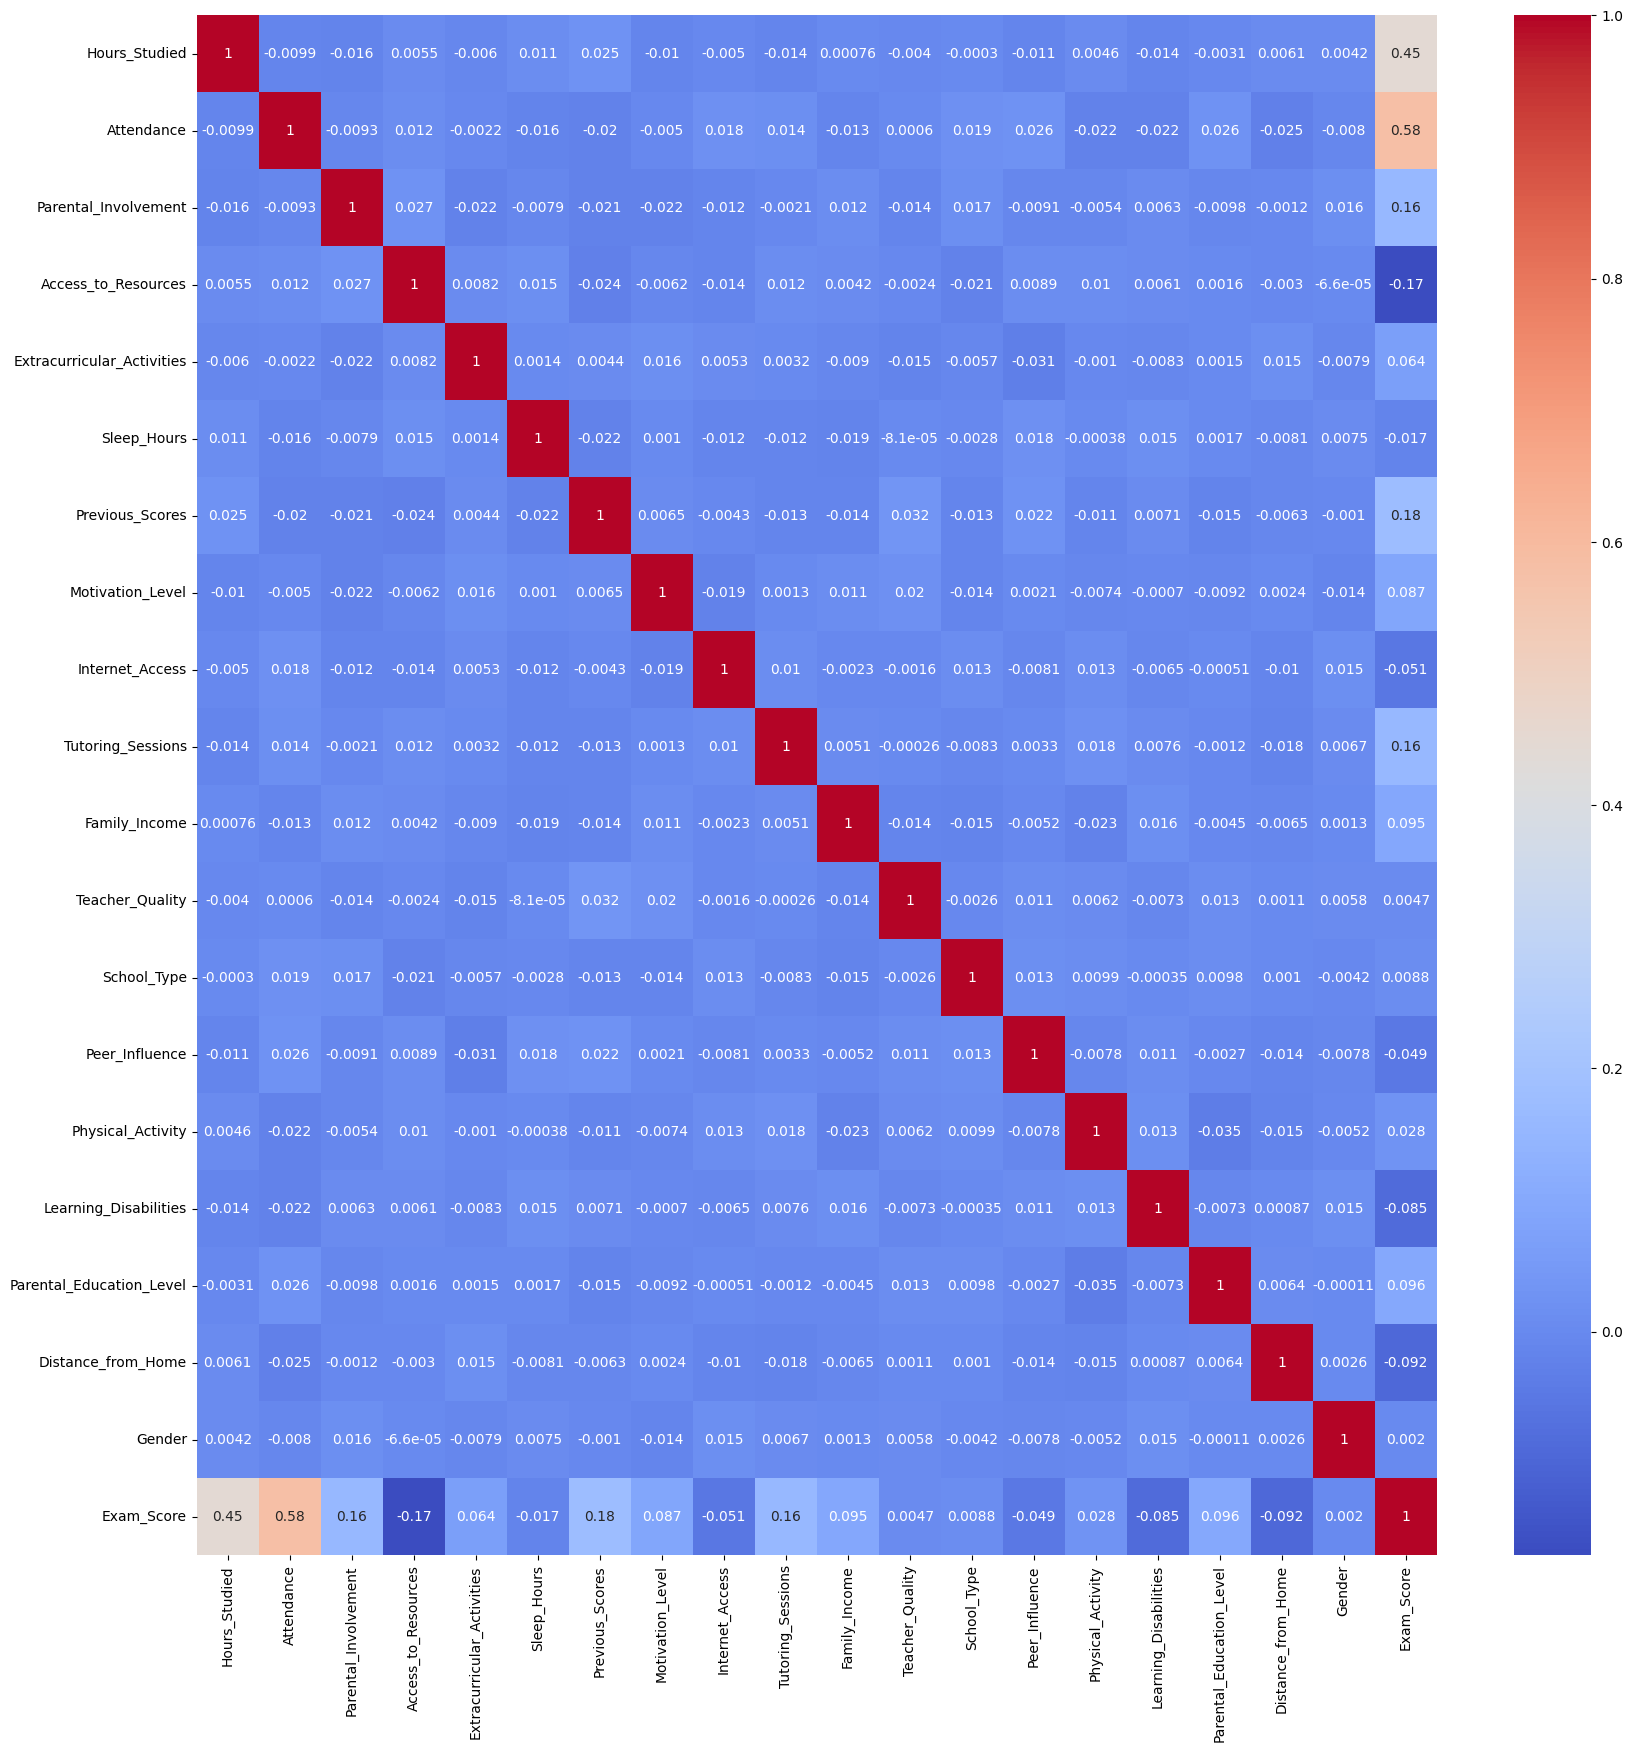

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)
plt.show()

# Explanation of each graph: #


### Histogram: ###
* Purpose:The goal of the histogram is to provide an excellent visual representation of the distribution of continuous data, particularly attendance.
* Insights: We can spot trends like this by examining the histogram.
* Skewness: Knowing if a high or low attendance rate is more concentrated among attendees aids in focusing efforts.
* Top Peaks: Knowing the most typical attendance levels might help raise engagement, especially for organizations that aren't performing well.
* Overall Distribution: This provides a clear picture of attendance trends, allowing teachers to gauge student involvement levels.

### Pie Chart ###
* Goal: The pie chart serves as a visual representation of pupils' motivation levels.
* Conclusions: The motivational category breakdown, with yellow denoting 29.3%, blue denoting 50.7%, and green denoting 20.0%, * * * highlights:
* Levels of Motivation Dominance: The blue section shows that a large percentage of students are very motivated, but the other categories' existence implies that pupils are not all that engaged.
* Focused Assistance: Initiatives to increase motivation among less involved students can benefit from an understanding of the range of motivational levels.
### Scatter Plot ###
* Goal: The scatter plot shows how exam results and attendance are related.
* Perspectives: This scatter plot allows us to identify:
* Correlation: A positive trend may show that better exam scores are associated with increased attendance, indicating that frequent presence is essential for academic achievement.
* Outliers: By identifying students who excel in spite of poor attendance, or vice versa, teachers can get an understanding of other her than attendance that affects academic success.
 
 ### Overall Conclusion:
 * When combined, these visuals provide a thorough understanding of the relationship between student population attendance, motivation, and test performance. They show not only statistical correlations but also chances for focused actions that might improve academic performance and student engagement. Educators may create a more encouraging and productive learning environment by using these findings to guide their actions.
 * The significance of ongoing monitoring and assessment of student performance determinants is emphasized by this comprehensive study, which aims to guarantee that every student has the chance to achieve.